<a href="https://colab.research.google.com/github/saks0106/DL_Frequent_Lookout/blob/main/0.0.Sentiment_Analysis_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# https://www.kaggle.com/crowdflower/twitter-airline-sentiment
!wget -nc https://lazyprogrammer.me/course_files/AirlineTweets.csv

--2023-10-10 11:40:52--  https://lazyprogrammer.me/course_files/AirlineTweets.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 172.67.213.166, 104.21.23.210, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|172.67.213.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3421431 (3.3M) [text/csv]
Saving to: ‘AirlineTweets.csv’

AirlineTweets.csv   100%[===================>]   3.26M  10.7MB/s    in 0.3s    

2023-10-10 11:40:53 (10.7 MB/s) - ‘AirlineTweets.csv’ saved [3421431/3421431]



In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix

from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
np.random.seed(0)
tf.random.set_seed(0)
df = pd.read_csv('AirlineTweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<Axes: >

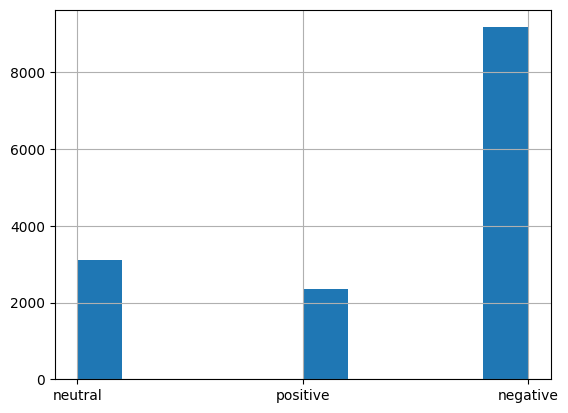

In [3]:
df = df[['airline_sentiment', 'text']]
df['airline_sentiment'].hist()


In [4]:

df = df[df['airline_sentiment'] != 'neutral'].copy()
target_map = {'positive': 1, 'negative': 0}
df['target'] = df['airline_sentiment'].map(target_map)
df.head()

,airline_sentiment,text,target
1,positive,@VirginAmerica plus you've added commercials t...,1
3,negative,@VirginAmerica it's really aggressive to blast...,0
4,negative,@VirginAmerica and it's a really big bad thing...,0
5,negative,@VirginAmerica seriously would pay $30 a fligh...,0
6,positive,"@VirginAmerica yes, nearly every time I fly VX...",1


In [5]:
df_train, df_test = train_test_split(df, random_state=42)
vectorizer = TfidfVectorizer(max_features=2000)
X_train = vectorizer.fit_transform(df_train['text'])
X_test = vectorizer.transform(df_test['text'])
# data must not be sparse matrix before passing into tensorflow
X_train = X_train.toarray()
X_test = X_test.toarray()
Y_train = df_train['target']
Y_test = df_test['target']
# input dimensions
D = X_train.shape[1]
# build model
i = Input(shape=(D,))
x = Dense(1)(i) # sigmoid included in loss

model = Model(i, x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2000)]            0         
                                                                 
 dense (Dense)               (None, 1)                 2001      
                                                                 
Total params: 2001 (7.82 KB)
Trainable params: 2001 (7.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
X_train[0].shape

(2000,)

In [6]:
model.compile(
  loss=BinaryCrossentropy(from_logits=True),
  optimizer=Adam(learning_rate=0.01),
  metrics=['accuracy']
)
r = model.fit(
  X_train, Y_train,
  validation_data=(X_test, Y_test),
  epochs=40,
  batch_size=128,
)

Epoch 1/40
68/68 [==============================] - 2s 8ms/step - loss: 0.5031 - accuracy: 0.7920 - val_loss: 0.3971 - val_accuracy: 0.8049
Epoch 2/40
68/68 [==============================] - 0s 4ms/step - loss: 0.3754 - accuracy: 0.7968 - val_loss: 0.3392 - val_accuracy: 0.8216
Epoch 3/40
68/68 [==============================] - 0s 3ms/step - loss: 0.3219 - accuracy: 0.8184 - val_loss: 0.3027 - val_accuracy: 0.8416
Epoch 4/40
68/68 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.8449 - val_loss: 0.2769 - val_accuracy: 0.8600
Epoch 5/40
68/68 [==============================] - 0s 3ms/step - loss: 0.2574 - accuracy: 0.8639 - val_loss: 0.2582 - val_accuracy: 0.8773
Epoch 6/40
68/68 [==============================] - 0s 3ms/step - loss: 0.2366 - accuracy: 0.8808 - val_loss: 0.2444 - val_accuracy: 0.8895
Epoch 7/40
68/68 [==============================] - 0s 3ms/step - loss: 0.2201 - accuracy: 0.8930 - val_loss: 0.2336 - val_accuracy: 0.9016
Epoch 8/40
68/68 [==

91/91 [==============================] - 0s 3ms/step


array([[0.99095551, 0.00904449],
       [0.09833333, 0.90166667]])

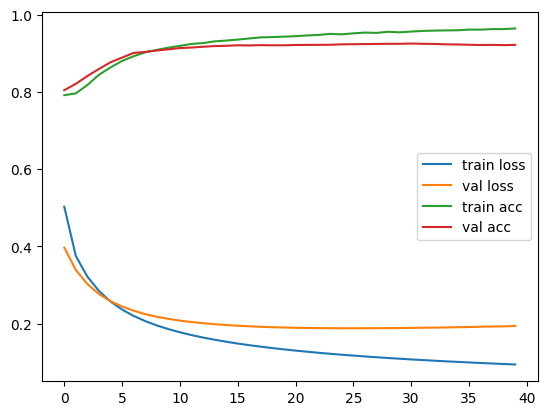

In [7]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend();

# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend();

P_train = ((model.predict(X_train) > 0) * 1.0).flatten()
P_test = ((model.predict(X_test) > 0) * 1.0).flatten()
cm = confusion_matrix(Y_train, P_train, normalize='true')
cm

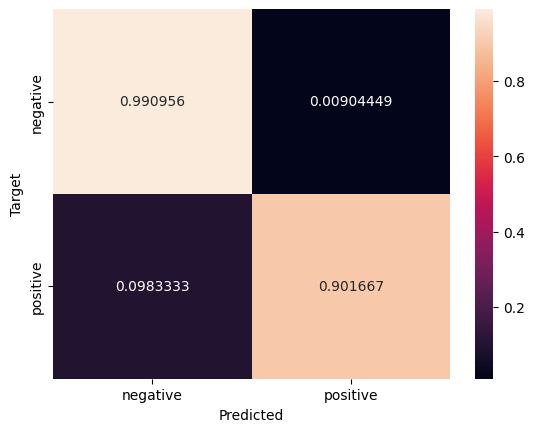

In [9]:

# Scikit-Learn is transitioning to V1 but it's not available on Colab
# The changes modify how confusion matrices are plotted
def plot_cm(cm):
  classes = ['negative', 'positive']
  df_cm = pd.DataFrame(cm, index=classes, columns=classes)
  ax = sn.heatmap(df_cm, annot=True, fmt='g')
  ax.set_xlabel("Predicted")
  ax.set_ylabel("Target")

plot_cm(cm)


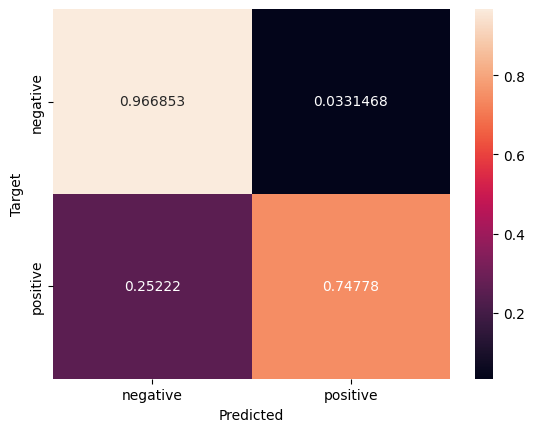

In [10]:

cm_test = confusion_matrix(Y_test, P_test, normalize='true')
plot_cm(cm_test)

In [12]:
Pr_train = model.predict(X_train)
Pr_test = model.predict(X_test)
print("Train AUC:", roc_auc_score(Y_train, Pr_train))
print("Test AUC:", roc_auc_score(Y_test, Pr_test))

91/91 [==============================] - 0s 3ms/step
Train AUC: 0.9950097252613663
Test AUC: 0.9547837709093328


In [13]:
print("Train F1:", f1_score(Y_train, P_train))
print("Test F1:", f1_score(Y_test, P_test))

Train F1: 0.9314203730272597
Test F1: 0.7935909519321396


In [14]:
model.layers

In [15]:
model.layers[1].get_weights()

[array([[-3.7609935],
        [ 3.2619014],
        [-1.575438 ],
        ...,
        [ 2.031299 ],
        [ 1.6112697],
        [-2.9457211]], dtype=float32),
 array([-0.24985027], dtype=float32)]

In [ ]:
model.layers[1].get_weights()

In [21]:
word_index_map = vectorizer.vocabulary_

In [19]:
# let's look at the weights for each word
# try it with different threshold values!
threshold = 2
w = model.layers[1].get_weights()[0]
print("Most positive words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight > threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: -x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most positive words:
thank 9.734361
thanks 9.3618765
worries 8.367716
great 7.937261
awesome 7.4042974
love 7.255451
excellent 7.1505775
kudos 6.7093935
amazing 6.4700847
best 6.133288


In [20]:
print("Most negative words:")
word_weight_tuples = []
for word, index in word_index_map.items():
    weight = w[index, 0]
    if weight < -threshold:
        word_weight_tuples.append((word, weight))

word_weight_tuples = sorted(word_weight_tuples, key=lambda x: x[1])
for i in range(10):
  word, weight = word_weight_tuples[i]
  print(word, weight)

Most negative words:
worst -9.327701
paid -7.738374
not -7.630925
rude -7.5426
disappointed -7.222558
website -6.8245916
nothing -6.7936497
hung -6.707644
instead -6.587882
worse -6.223291
